Workout AI: desc

In [ ]:
!git clone https://github.com/enriqueesanchz/workoutAI.git

fatal: destination path 'workoutAI' already exists and is not an empty directory.


In [ ]:
#Leo los archivos.csv
import os

for archivo in os.listdir('workoutAI/data/csv'):
  print(archivo)

triceps_unilateral.csv
press_sentado.csv
jalon_unilateral.csv
biceps_martillo.csv
press_militar.csv
remo_bajo.csv
biceps_unilateral.csv
press_militar_2.csv
jalon_al_pecho.csv
press_sentado_2.csv
press_inclinado.csv
press_inclinado_2.csv
triceps_polea.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Especifica el directorio que contiene los archivos CSV
directorio = 'workoutAI/data/csv'

# Obtén la lista de archivos en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]


# Inicializa un DataFrame vacío
train = pd.DataFrame()
val = pd.DataFrame()
test = pd.DataFrame()

# Itera sobre la lista de archivos CSV
for archivo in archivos_csv:
    # Construye la ruta completa del archivo
    ruta_archivo = os.path.join(directorio, archivo)

    # Lee el archivo CSV actual en un DataFrame
    df_actual = pd.read_csv(ruta_archivo)

    # Añade una columna "actividad" con el nombre del archivo
    df_actual['actividad'] = archivo.rstrip('.csv').rstrip('_2')

    df_train, df_test= train_test_split(df_actual, test_size=0.15, shuffle=False)
    df_train, df_val= train_test_split(df_train, test_size=0.15, shuffle=False)

    # Concatena el DataFrame actual al DataFrame final
    train = pd.concat([train, df_train], ignore_index=True)
    val = pd.concat([val, df_val], ignore_index=True)
    test = pd.concat([test, df_test], ignore_index=True)

print(train.shape)
print(val.shape)
print(test.shape)

(26363, 8)
(4662, 8)
(5475, 8)


In [ ]:
#Visualizamos la cantidad de datos que tenemos
import matplotlib.pyplot as plt
#plt.style.use("seaborn") # estilo de gráficas

actividades = train['actividad'].value_counts()
plt.bar(range(len(actividades)), actividades.values)
plt.xticks(range(len(actividades)), actividades.index)

([<matplotlib.axis.XTick at 0x7d313c4bd150>,
 [Text(0, 0, 'press_sentado'),
  Text(1, 0, 'press_militar'),
  Text(2, 0, 'press_inclinado'),
  Text(3, 0, 'triceps_unilateral'),
  Text(4, 0, 'jalon_unilateral'),
  Text(5, 0, 'biceps_martillo'),
  Text(6, 0, 'remo_bajo'),
  Text(7, 0, 'biceps_unilateral'),
  Text(8, 0, 'jalon_al_pecho'),
  Text(9, 0, 'triceps_polea')])

In [ ]:
#%% visualizamos

def dibuja_datos_aceleracion(subset, actividad):
    plt.figure(figsize=(5,14))

    plt.subplot(211)
    plt.title(actividad)
    plt.xlabel("Tiempo", fontsize=5)
    plt.plot(subset["accel_x"].values, label='accel_x')
    plt.plot(subset["accel_y"].values, label='accel_y')
    plt.plot(subset["accel_z"].values, label='accel_z')
    plt.legend(loc="upper left")

    plt.subplot(212)
    plt.xlabel("Tiempo", fontsize=5)
    plt.plot(subset["gyro_x"].values, label='gyro_x')
    plt.plot(subset["gyro_y"].values, label='gyro_y')
    plt.plot(subset["gyro_z"].values, label='gyro_z')
    plt.legend(loc="upper left")


for actividad in np.unique(train['actividad']):
    subset = train[train['actividad'] == actividad][9*80:10*80]
    dibuja_datos_aceleracion(subset, actividad)

In [ ]:

#%% Codificamos la actividad de manera numérica

from sklearn import preprocessing

LABEL = 'ActivityEncoded'
# Transformar las etiquetas de String a Integer mediante LabelEncoder
le = preprocessing.LabelEncoder()

# Añadir una nueva columna al DataFrame existente con los valores codificados
train[LABEL] = le.fit_transform(train['actividad'].values.ravel())
val[LABEL] = le.fit_transform(val['actividad'].values.ravel())
test[LABEL] = le.fit_transform(test['actividad'].values.ravel())

print(train[['actividad', 'ActivityEncoded']].value_counts())
print(val[['actividad', 'ActivityEncoded']].value_counts())
print(test[['actividad', 'ActivityEncoded']].value_counts())

actividad           ActivityEncoded
press_inclinado     4                  2889
press_militar       5                  2889
press_sentado       6                  2889
biceps_martillo     0                  2528
biceps_unilateral   1                  2528
jalon_al_pecho      2                  2528
jalon_unilateral    3                  2528
remo_bajo           7                  2528
triceps_polea       8                  2528
triceps_unilateral  9                  2528
dtype: int64
actividad           ActivityEncoded
press_inclinado     4                  511
press_militar       5                  511
press_sentado       6                  511
biceps_martillo     0                  447
biceps_unilateral   1                  447
jalon_al_pecho      2                  447
jalon_unilateral    3                  447
remo_bajo           7                  447
triceps_polea       8                  447
triceps_unilateral  9                  447
dtype: int64
actividad           ActivityEnco

In [ ]:
#%% Normalizamos los datos
#TODO: probar diferentes normalizaciones

for data in [train, val, test]:
  data["accel_x"] = (data["accel_x"] ) / (max(data["accel_x"].values))
  data["accel_y"] = (data["accel_y"] ) / (max(data["accel_y"].values) )
  data["accel_z"] = (data["accel_z"] ) / (max(data["accel_z"].values) )

  data["gyro_x"] = (data["gyro_x"] ) / (max(data["gyro_x"].values) )
  data["gyro_y"] = (data["gyro_y"] ) / (max(data["gyro_y"].values) )
  data["gyro_z"] = (data["gyro_z"] ) / (max(data["gyro_z"].values) )

train.tail()
test.tail()

,t,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,actividad,ActivityEncoded
5470,194.015259,0.289779,0.100000,-0.714177,0.066874,-0.348633,-0.135546,triceps_polea,8
5471,194.178952,0.235438,0.167517,-0.838735,0.124692,-0.572789,-0.232172,triceps_polea,8
5472,194.228728,0.205153,0.281477,-1.123136,0.100799,-0.684536,-0.294330,triceps_polea,8
5473,194.258602,0.121016,0.235839,-0.910717,0.031365,-0.710154,-0.346472,triceps_polea,8
5474,194.307136,0.061180,0.258121,-1.138308,0.152544,-0.790210,-0.272604,triceps_polea,8


In [ ]:
#Representamos para comprobar la normalizacion

for actividad in np.unique(train['actividad']):
    subset = train[train['actividad'] == actividad][9*80:10*80]
    dibuja_datos_aceleracion(subset, actividad)

<ipython-input-326-6f209101be01>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,14))


In [ ]:
#%% comprobamos cual ha sido la división

print("Entrenamiento", train.shape[0]/(train.shape[0]+test.shape[0]+val.shape[0]))
print("Validation", val.shape[0]/(train.shape[0]+test.shape[0]+val.shape[0]))
print("Test", test.shape[0]/(train.shape[0]+test.shape[0]+val.shape[0]))

Entrenamiento 0.8280356806332057
Validation 0.1719643193667944
Test 0.1719643193667944


In [ ]:
#%% Creamos las secuencias

from scipy import stats

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html

def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleraciones
    N_FEATURES = 6
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        accel_xs = df['accel_x'].values[i: i + time_steps]
        accel_ys = df['accel_y'].values[i: i + time_steps]
        accel_zs = df['accel_z'].values[i: i + time_steps]
        gyro_xs = df['gyro_x'].values[i: i + time_steps]
        gyro_ys = df['gyro_y'].values[i: i + time_steps]
        gyro_zs = df['gyro_z'].values[i: i + time_steps]
        # Lo etiquetamos como la actividad más frecuente
        label = stats.mode(df[label_name][i: i + time_steps])[0]
        segments.append([accel_xs, accel_ys, accel_zs, gyro_xs, gyro_ys, gyro_zs])
        labels.append(label)

    # Los pasamos a vector
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

TIME_PERIODS = 40
STEP_DISTANCE = 10

x_train, y_train = create_segments_and_labels(train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

x_val, y_val = create_segments_and_labels(val,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

x_test, y_test = create_segments_and_labels(test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

In [ ]:
#%% observamos la nueva forma de los datos (40, 6)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_train shape: ', x_val.shape)
print('y_train shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)


x_train shape:  (2633, 40, 6)
y_train shape:  (2633,)
x_train shape:  (463, 40, 6)
y_train shape:  (463,)
x_test shape:  (544, 40, 6)
y_test shape:  (544,)


In [ ]:
#%% datos de entrada de la red neuronal

num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

['biceps_martillo', 'biceps_unilateral', 'jalon_al_pecho', 'jalon_unilateral', 'press_inclinado', 'press_militar', 'press_sentado', 'remo_bajo', 'triceps_polea', 'triceps_unilateral']


In [ ]:
#%% transformamos los datos a flotantes

x_train = x_train.astype('float32')
#y_train = y_train.astype('float32')

x_val = x_val.astype('float32')
#y_train = y_train.astype('float32')

x_test = x_test.astype('float32')
#y_test = y_test.astype('float32')

In [ ]:
#%% Realizamos el one-hote econding para los datos de salida

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
y_train_hot = cat_encoder.fit_transform(y_train.reshape(len(y_train),1))
y_train = y_train_hot.toarray()

y_val_hot = cat_encoder.fit_transform(y_val.reshape(len(y_val),1))
y_val = y_val_hot.toarray()

In [ ]:
#%% RED NEURONAL

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv1D, MaxPool1D, Flatten

epochs = 70
batch_size = 40
filters = 128
n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]

model_m = Sequential()
model_m.add(Conv1D(filters=filters, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
model_m.add(Conv1D(filters=filters/2, kernel_size=5, activation='relu'))
model_m.add(Dropout(0.5))
model_m.add(MaxPool1D(pool_size=2))
model_m.add(Flatten())
model_m.add(Dense(1000, activation='relu'))
model_m.add(Dense(n_outputs, activation='softmax'))
model_m.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 36, 128)           3968      
                                                                 
 conv1d_37 (Conv1D)          (None, 32, 64)            41024     
                                                                 
 dropout_18 (Dropout)        (None, 32, 64)            0         
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 16, 64)            0         
 ng1D)                                                           
                                                                 
 flatten_18 (Flatten)        (None, 1024)              0         
                                                                 
 dense_36 (Dense)            (None, 1000)              1025000   
                                                     

In [ ]:
#%% Compilamps el modelo y entrenamos

from tensorflow.keras import callbacks

model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks_list = [
    callbacks.ModelCheckpoint(
        filepath='best_model_padel.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    #callbacks.EarlyStopping(monitor='accuracy', patience=20)
]

# fit network
history = model_m.fit(x_train,
                      y_train,
                      batch_size=batch_size,
                      validation_data=(x_val, y_val),
                      shuffle=True,
                      epochs=epochs,
                      verbose=1,
                      callbacks=callbacks_list)

Epoch 1/70
66/66 [==============================] - 2s 9ms/step - loss: 0.5945 - accuracy: 0.8131 - val_loss: 0.5983 - val_accuracy: 0.7905
Epoch 2/70
26/66 [==========>...................] - ETA: 0s - loss: 0.1938 - accuracy: 0.9423

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 0s 6ms/step - loss: 0.1573 - accuracy: 0.9556 - val_loss: 0.7308 - val_accuracy: 0.7235
Epoch 3/70
66/66 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9700 - val_loss: 2.0503 - val_accuracy: 0.6156
Epoch 4/70
66/66 [==============================] - 0s 5ms/step - loss: 0.0662 - accuracy: 0.9780 - val_loss: 1.1971 - val_accuracy: 0.6760
Epoch 5/70
66/66 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 0.9837 - val_loss: 0.7855 - val_accuracy: 0.7775
Epoch 6/70
66/66 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.9897 - val_loss: 1.0509 - val_accuracy: 0.7970
Epoch 7/70
66/66 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9875 - val_loss: 1.3511 - val_accuracy: 0.7883
Epoch 8/70
66/66 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 1.3679 - val_accuracy: 0.7387
Epoch 9/70
66/66 [=============

In [ ]:
#%% visualizamos el entrenamiento

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# actualizar dependiendo del nombre del modelo guardado
y_test_hot = cat_encoder.fit_transform(y_test.reshape(len(y_test),1))
y_test = y_test_hot.toarray()

In [ ]:
#Cargar el mejor modelo
#model = keras.models.load_model("best_model_padel.43-0.34.h5")

In [ ]:
#%% Evaluamos el modelo en los datos de test
test_loss, test_acc = model_m.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)


17/17 [==============================] - 0s 3ms/step - loss: 1.3966 - accuracy: 0.8842
Test accuracy 0.8841911554336548
Test loss 1.3965736627578735


In [ ]:
#%%
from sklearn.metrics import classification_report

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
max_y_train = np.argmax(y_train, axis=1)
print(classification_report(max_y_train, max_y_pred_train))


83/83 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       253
           2       1.00      1.00      1.00       253
           3       1.00      1.00      1.00       253
           4       1.00      1.00      1.00       289
           5       1.00      1.00      1.00       289
           6       1.00      1.00      1.00       289
           7       1.00      1.00      1.00       252
           8       1.00      1.00      1.00       251
           9       1.00      1.00      1.00       251

    accuracy                           1.00      2633
   macro avg       1.00      1.00      1.00      2633
weighted avg       1.00      1.00      1.00      2633



17/17 [==============================] - 0s 2ms/step


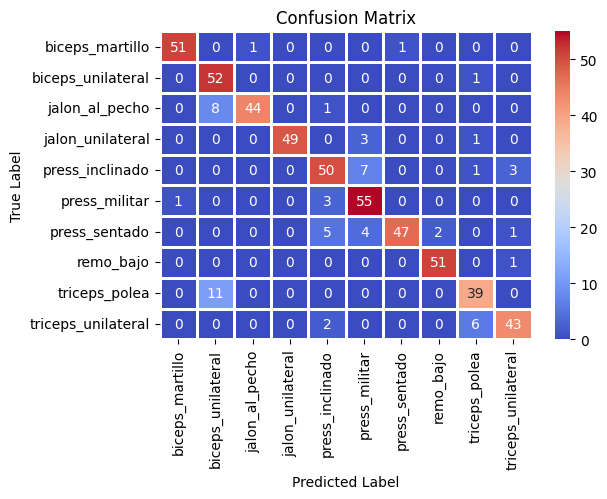

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.73      0.98      0.84        53
           2       0.98      0.83      0.90        53
           3       1.00      0.92      0.96        53
           4       0.82      0.82      0.82        61
           5       0.80      0.93      0.86        59
           6       0.98      0.80      0.88        59
           7       0.96      0.98      0.97        52
           8       0.81      0.78      0.80        50
           9       0.90      0.84      0.87        51

    accuracy                           0.88       544
   macro avg       0.90      0.89      0.89       544
weighted avg       0.89      0.88      0.89       544



In [ ]:
#%%
import seaborn as sns
from sklearn import metrics
plt.rcParams.update(plt.rcParamsDefault)

LABELS = list(set(train['actividad']))
LABELS.sort()

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model_m.predict(x_test)
# Toma la clase con la mayor probabilidad a partir de las predicciones de la prueba
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))